This project work predicts car price. The data that was used is from:https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge.

Disclaimer: as a beginner in Data Science I looked some ML approach ideas in: https://www.kaggle.com/code/moe5998/car-price-prediction-eda-ml-regression-models/notebook and in https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [69]:
df=pd.read_csv('car_price_prediction.csv')

In [70]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [72]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [73]:
df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
873        1
115        1
7063       1
3008       1
2386       1
Name: Levy, Length: 559, dtype: int64

Levy column contains a lot of dashes and I don't think that this feature plays a big role in prediction so I better delete it.

In [74]:
del df['Levy']

In [75]:
df['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
122950 km      1
150747 km      1
104674 km      1
147845 km      1
10900 km       1
Name: Mileage, Length: 7687, dtype: int64

It is better to have this feature as continuous

In [76]:
df['Mileage']=df["Mileage"].apply(lambda x: x.split(' ')[0])
df['Mileage']=df['Mileage'].astype(int)

In [77]:
df['Engine volume'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
1.1 Turbo       1
0.4 Turbo       1
3.1             1
0.3 Turbo       1
6.8             1
Name: Engine volume, Length: 107, dtype: int64

In [78]:
df['Engine volume']=df["Engine volume"].apply(lambda x: x.split(' ')[0])
df['Engine volume']=df['Engine volume'].astype(float)

Now let's do Exploratory Data Analysis part:

In [79]:
df['Price'].sort_values(ascending=False).head(10)

16983    26307500
8541       872946
1225       627220
5008       308906
14839      297930
9367       297930
7749       288521
10759      260296
5840       254024
15283      250574
Name: Price, dtype: int64

In [80]:
df['Price'].sort_values(ascending=False).tail(10)

15347    3
4776     3
14492    3
14642    3
5890     3
7276     3
17596    3
13419    3
16992    1
7815     1
Name: Price, dtype: int64

In [81]:
df['Price'].value_counts()

15681    280
470      274
14113    244
392      242
314      235
        ... 
14686      1
12639      1
18800      1
16753      1
16408      1
Name: Price, Length: 2315, dtype: int64

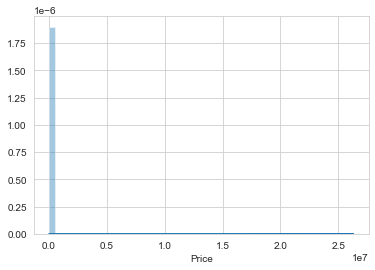

In [82]:
sns.set_style('whitegrid')
sns.distplot(df['Price'])

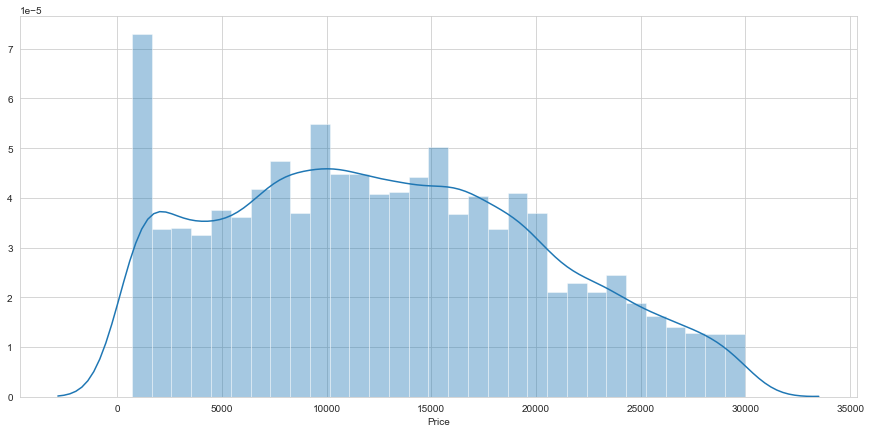

In [83]:
fig,ag=plt.subplots(figsize=(15,7))
sns.distplot(df[(df['Price']<30000)&(df['Price']>700)]['Price'])

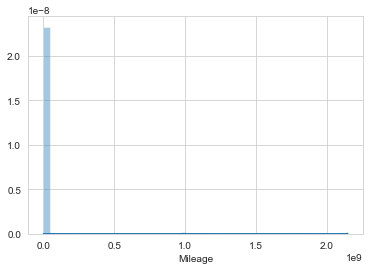

In [84]:
sns.distplot(df['Mileage'])

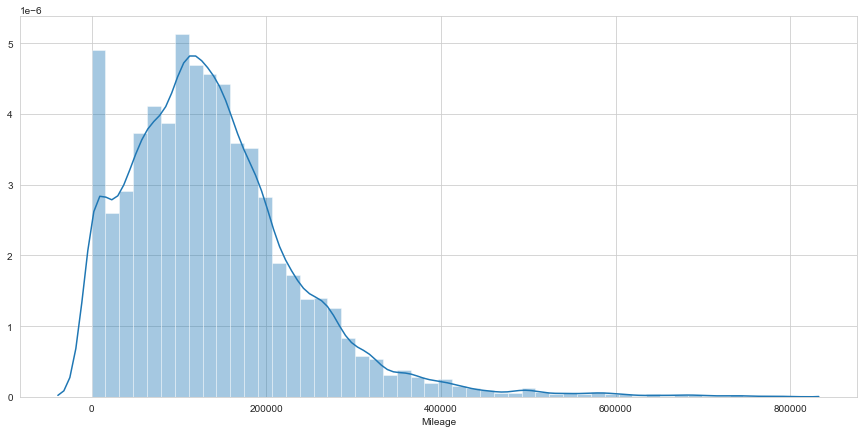

In [85]:
fig,ag=plt.subplots(figsize=(15,7))
sns.distplot(df[df['Mileage']<800000]['Mileage'])

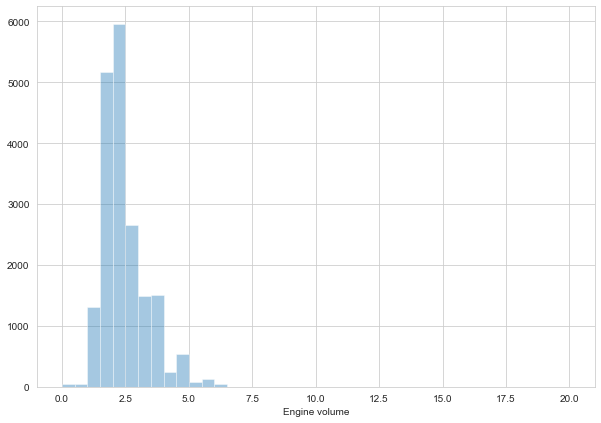

In [86]:
fig,ag=plt.subplots(figsize=(10,7))
sns.distplot(df['Engine volume'],kde=False,bins=40)

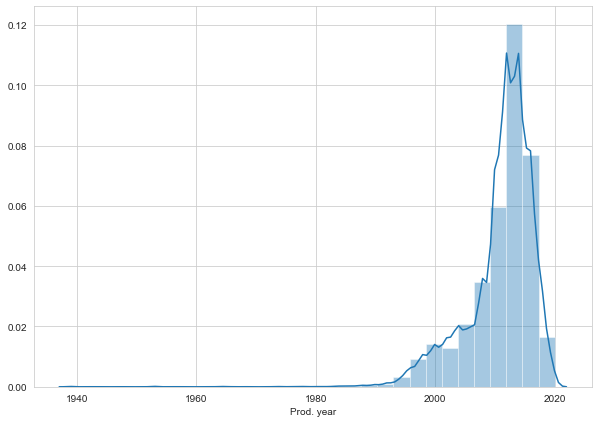

In [87]:
fig,ag=plt.subplots(figsize=(10,7))
sns.distplot(df['Prod. year'],bins=30)

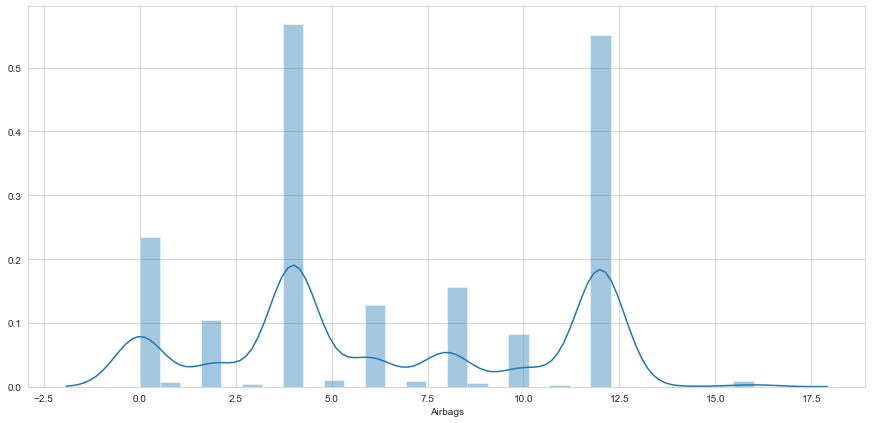

In [88]:
fig,ax=plt.subplots(figsize=(15,7))
sns.distplot(df['Airbags'],bins=30)

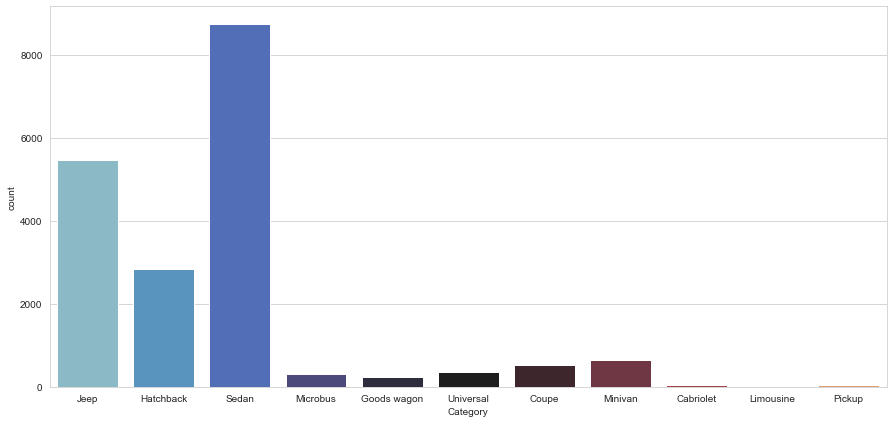

In [89]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Category',palette='icefire')

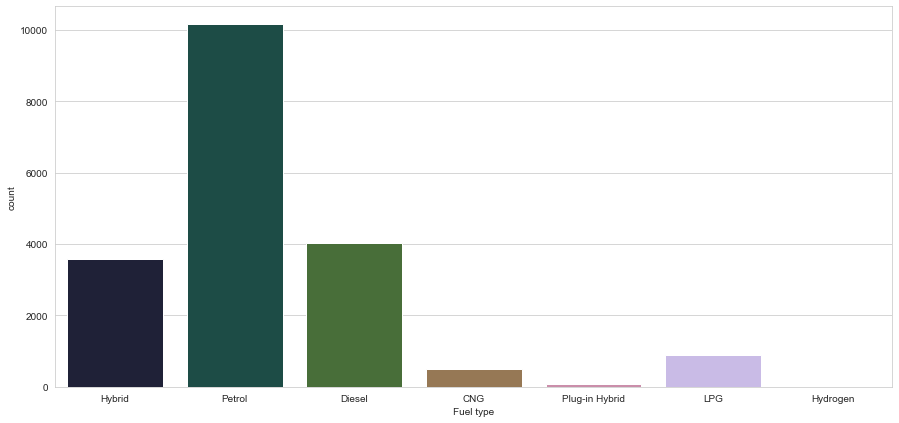

In [90]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Fuel type',palette='cubehelix')

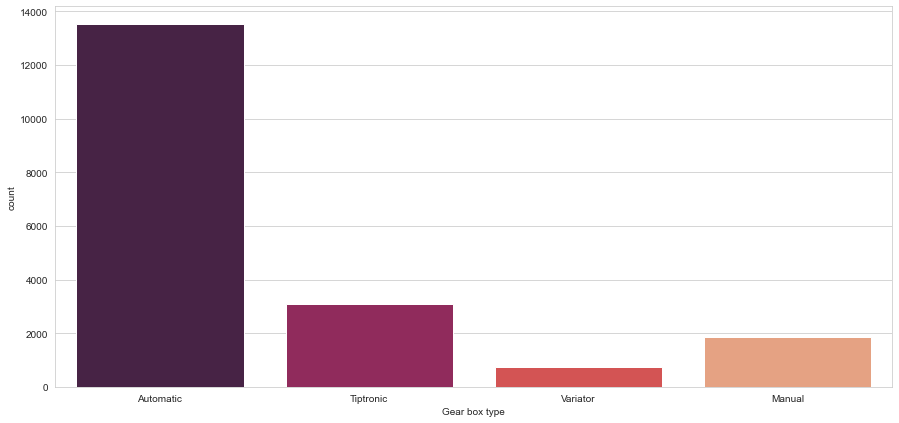

In [91]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Gear box type',palette='rocket')

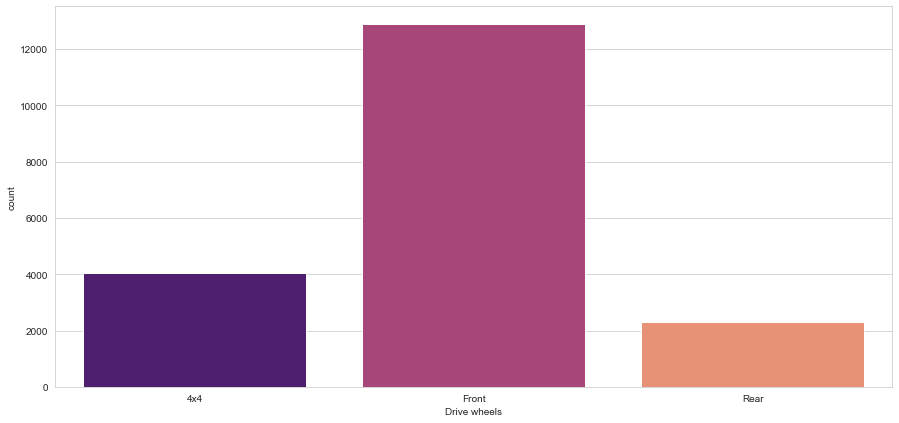

In [92]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Drive wheels',palette='magma')

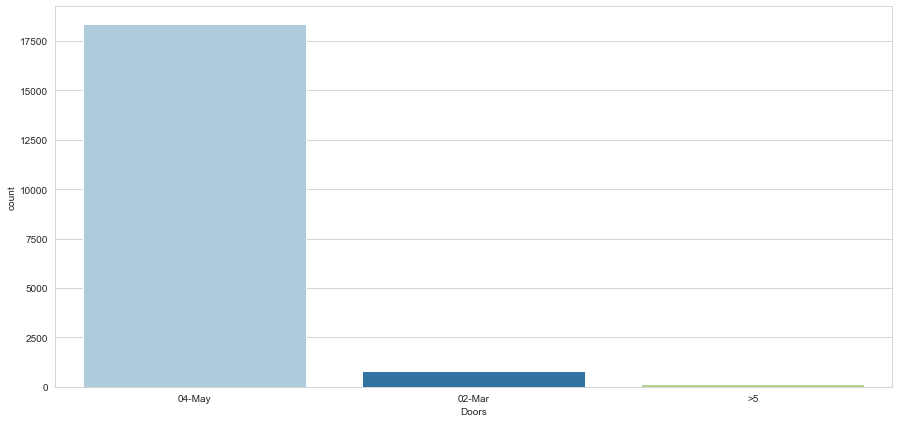

In [93]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Doors',palette='Paired')

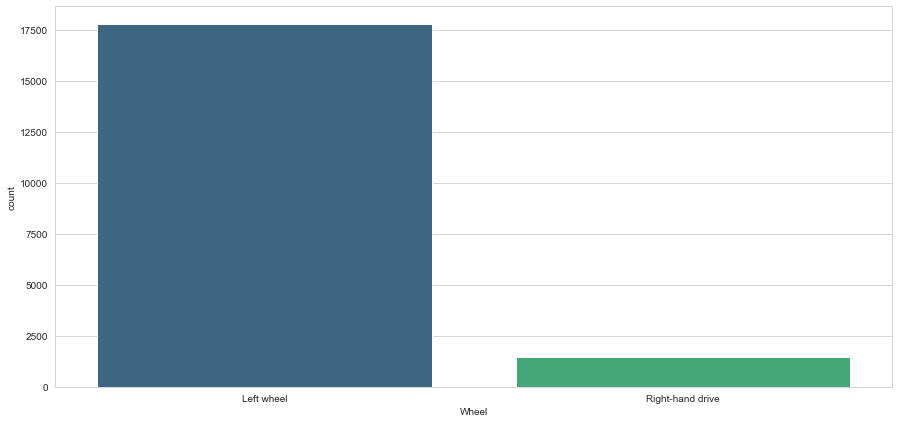

In [94]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Wheel',palette='viridis')

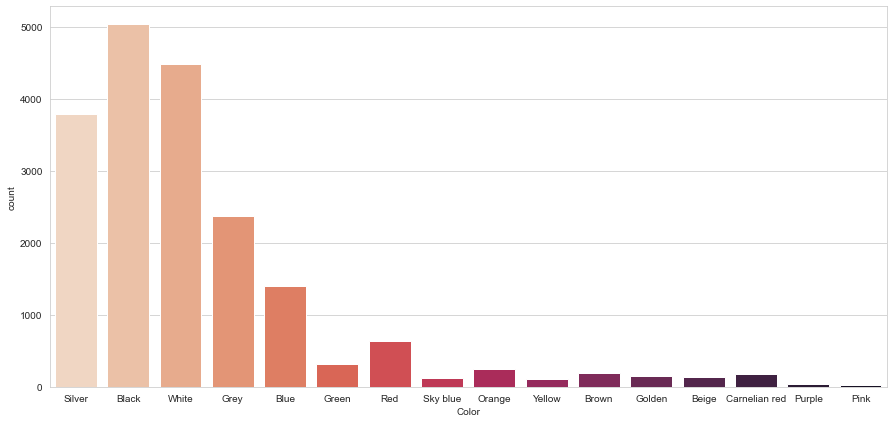

In [95]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Color',palette='rocket_r')

In [96]:
df_filt=df[(df['Price']<30000)&(df['Price']>700)]

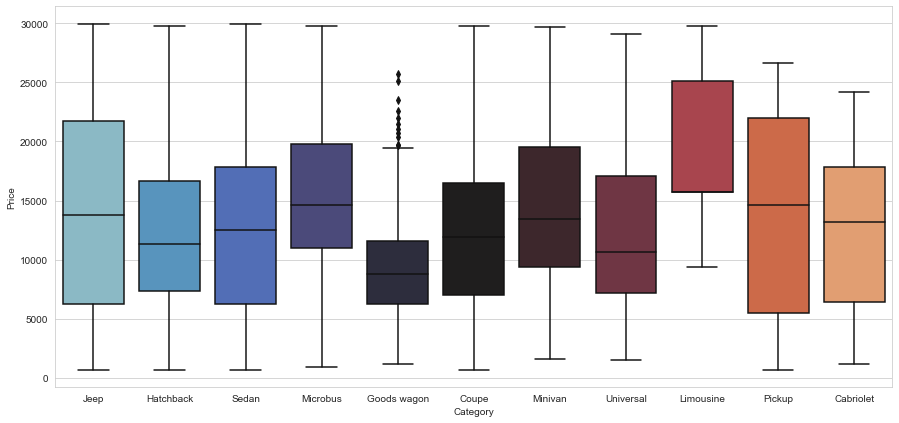

In [97]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Category', y='Price',palette='icefire')

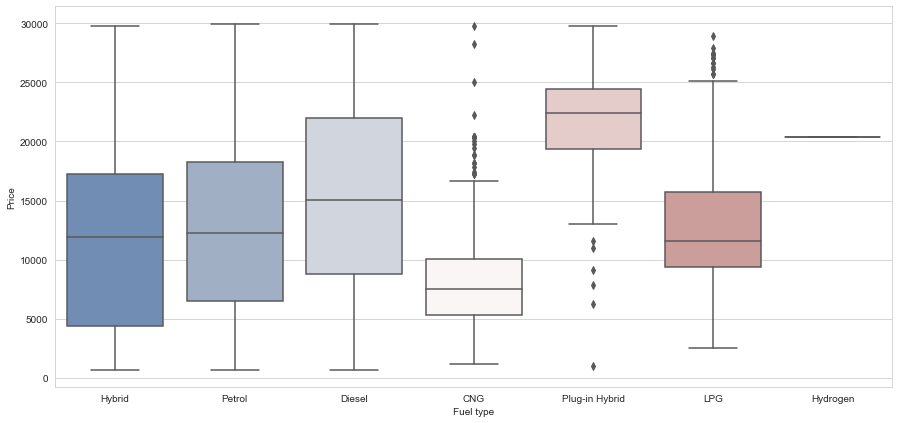

In [98]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Fuel type', y='Price',palette='vlag')

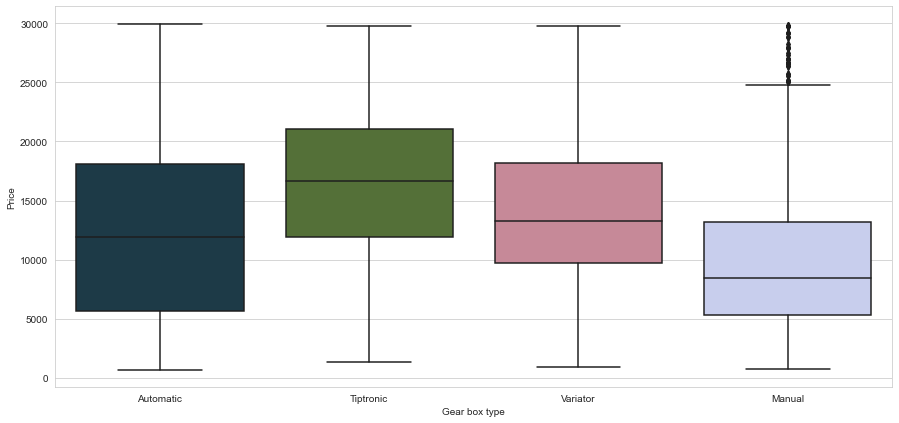

In [99]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Gear box type', y='Price',palette='cubehelix')

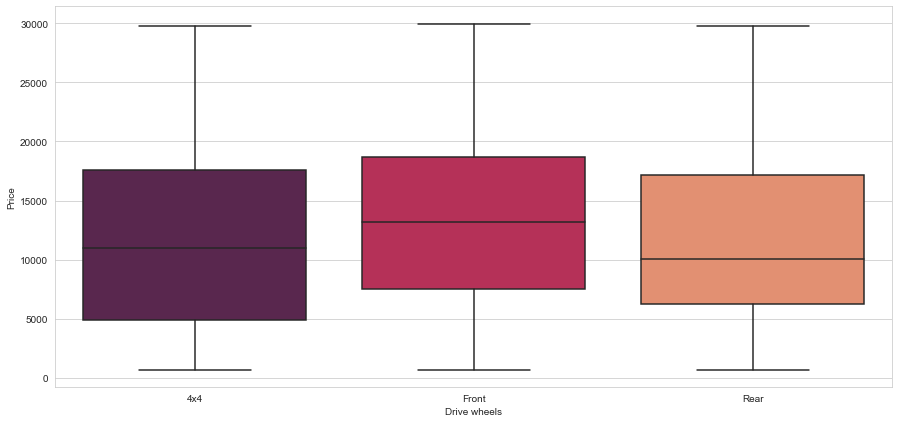

In [100]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Drive wheels', y='Price',palette='rocket')

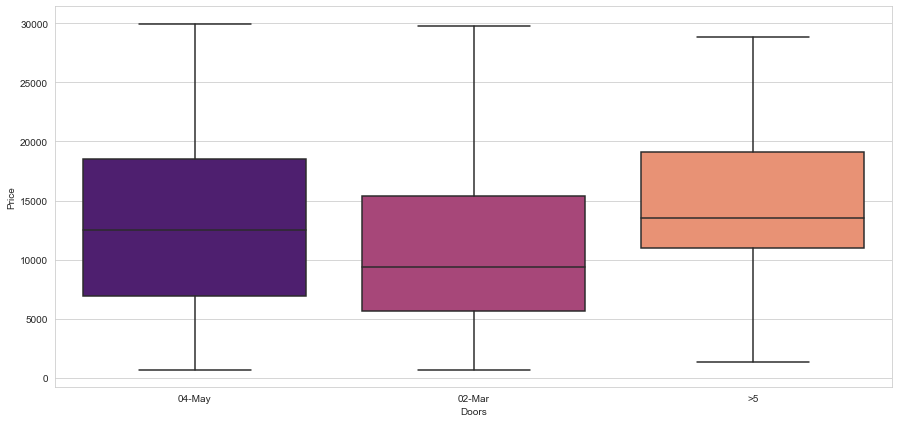

In [101]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Doors', y='Price',palette='magma')

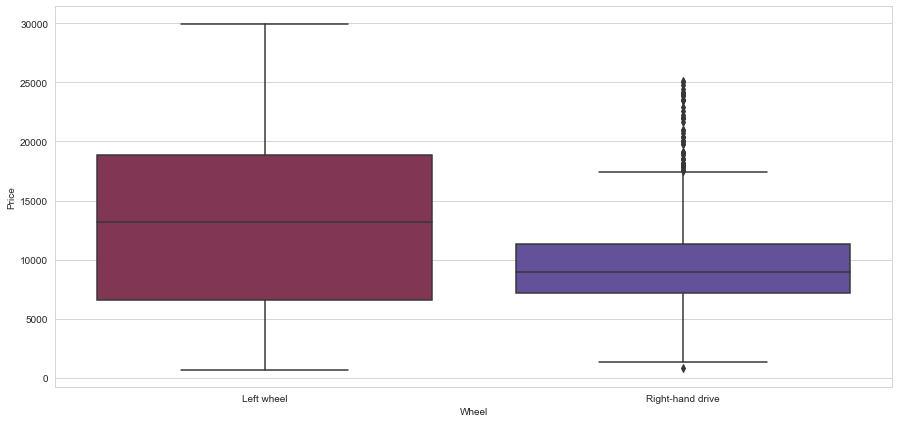

In [102]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Wheel', y='Price',palette='twilight_r')

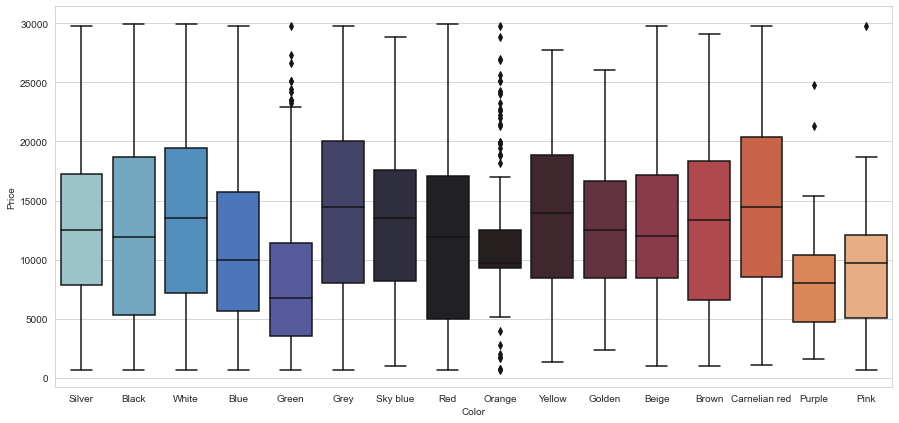

In [103]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Color', y='Price',palette='icefire')

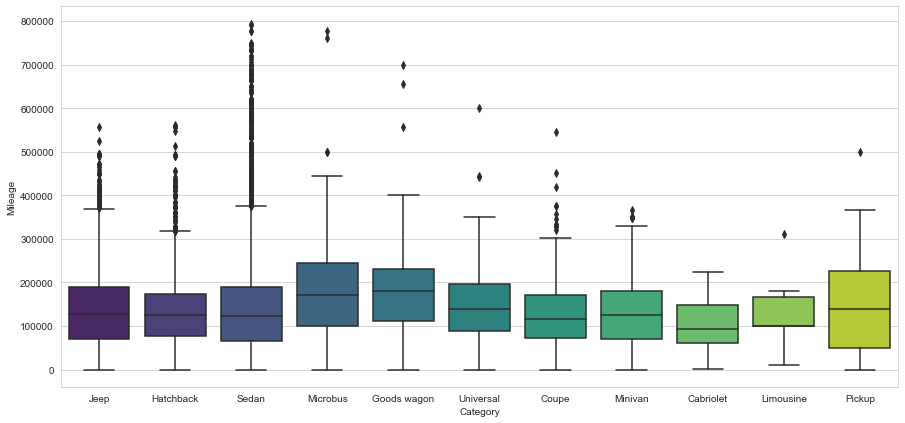

In [104]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df[df['Mileage']<800000],x='Category', y='Mileage',palette='viridis')

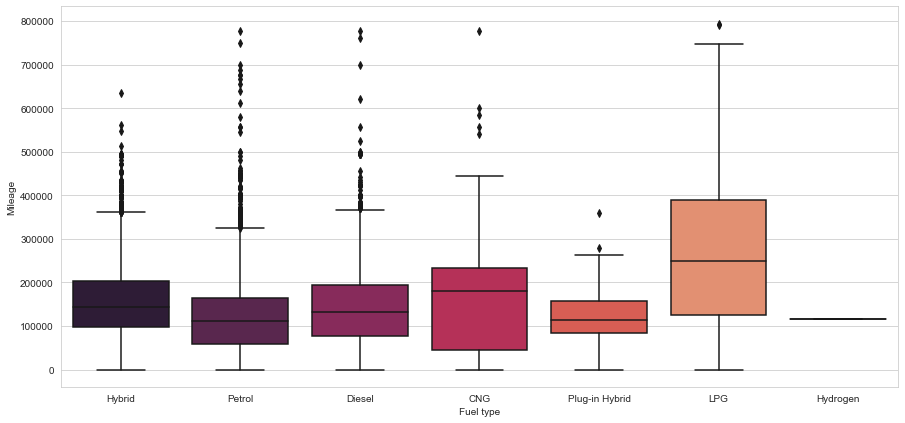

In [105]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df[df['Mileage']<800000],x='Fuel type', y='Mileage',palette='rocket')

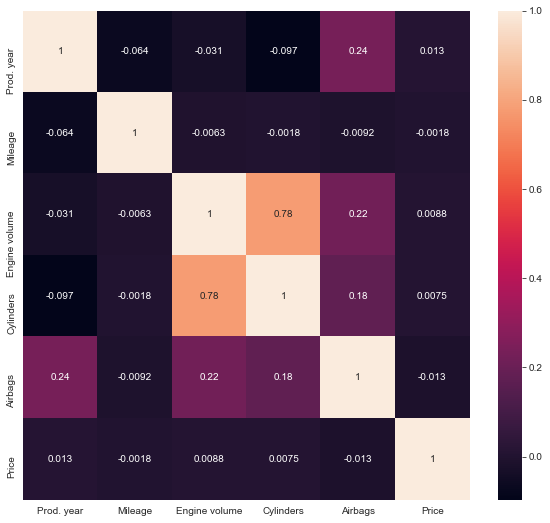

In [106]:
num_vars = ['Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags', 'Price']
fig,ax=plt.subplots(figsize=(10,9))
sns.heatmap(df[num_vars].corr(),annot=True)

Let's do a little data preprocessing. I need to deal with outliers:

In [107]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
def handling_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for i in range(df.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data
cont_d=['Price','Mileage','Engine volume']
df = handling_outliers(df, cont_d)

<ipython-input-107-546595503a9c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound
<ipython-input-107-546595503a9c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = lower_bound


Price and Mileage features had pretty big outliers, now it is solved. I am going to turn object type columns into dummy variables.

In [108]:
def dummies(col,df):
    temp = pd.get_dummies(df[col], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([col], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df = dummies('Leather interior',df)
df = dummies('Wheel',df)
df = dummies('Drive wheels',df)
df = dummies('Gear box type',df)
df = dummies('Fuel type',df)
df = dummies('Category',df)
df = dummies('Color',df)
df = dummies('Doors',df)

In [109]:
df.head()

,ID,Price,Manufacturer,Model,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Yes,...,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow,04-May,>5
0,45654403,13328,LEXUS,RX 450,2010,3.5,186005,6.0,12,1,...,0,0,0,0,1,0,0,0,1,0
1,44731507,16621,CHEVROLET,Equinox,2011,3.0,192000,6.0,8,0,...,0,0,0,0,0,0,0,0,1,0
2,45774419,8467,HONDA,FIT,2006,1.3,200000,4.0,2,0,...,0,0,0,0,0,0,0,0,1,0
3,45769185,3607,FORD,Escape,2011,2.5,168966,4.0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,45809263,11726,HONDA,FIT,2014,1.3,91901,4.0,4,1,...,0,0,0,0,1,0,0,0,1,0


In [110]:
df=df.drop(['Manufacturer','Model','ID'],axis=1)

Now we are ready for ML, let's define train and test sets:

In [111]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

I am going to scale numerical features:

In [112]:
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-112-d2e9929d104a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [113]:
df_train.head()

,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Yes,Right-hand drive,Front,Rear,...,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow,04-May,>5
16441,0.357978,0.901235,0.446429,0.423227,0.2,0.25,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
10299,0.089701,0.962963,0.589286,0.190068,0.2,0.75,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12492,0.945327,0.950617,0.267857,0.196359,0.2,0.25,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4365,0.156156,0.901235,0.089286,0.108651,0.2,0.25,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2456,0.445243,0.913580,0.589286,0.275297,0.2,0.75,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [114]:
X_train = df_train.drop('Price',axis=1)
y_train = df_train['Price']

Let's implement Recursive Feature Elimination in order to define features with the most impact:

In [115]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [116]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Prod. year', True, 1),
 ('Engine volume', False, 12),
 ('Mileage', True, 1),
 ('Cylinders', True, 1),
 ('Airbags', True, 1),
 ('Yes', False, 31),
 ('Right-hand drive', False, 4),
 ('Front', False, 11),
 ('Rear', False, 10),
 ('Manual', False, 6),
 ('Tiptronic', True, 1),
 ('Variator', False, 3),
 ('Diesel', True, 1),
 ('Hybrid', False, 8),
 ('Hydrogen', False, 13),
 ('LPG', False, 36),
 ('Petrol', False, 35),
 ('Plug-in Hybrid', True, 1),
 ('Coupe', False, 29),
 ('Goods wagon', True, 1),
 ('Hatchback', True, 1),
 ('Jeep', False, 32),
 ('Limousine', True, 1),
 ('Microbus', False, 7),
 ('Minivan', False, 30),
 ('Pickup', False, 9),
 ('Sedan', False, 2),
 ('Universal', False, 34),
 ('Black', False, 21),
 ('Blue', False, 20),
 ('Brown', False, 26),
 ('Carnelian red', False, 25),
 ('Golden', False, 28),
 ('Green', False, 23),
 ('Grey', False, 27),
 ('Orange', False, 17),
 ('Pink', False, 14),
 ('Purple', False, 5),
 ('Red', False, 18),
 ('Silver', False, 19),
 ('Sky blue', False, 33),
 (

In [117]:
X_train.columns[rfe.support_]

Index(['Prod. year', 'Mileage', 'Cylinders', 'Airbags', 'Tiptronic', 'Diesel',
       'Plug-in Hybrid', 'Goods wagon', 'Hatchback', 'Limousine'],
      dtype='object')

We decreased number of features to 10 the most impactful ones. 

In [118]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [119]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

<ipython-input-119-126a5f4b3663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [120]:
X_test = df_test.drop('Price',axis=1)
y_test = df_test['Price']
X_test_new = X_test[X_train_rfe.columns]

Let's first try Linear Regression Model and then look at more advanced regression models:

In [121]:
lm.fit(X_train_rfe,y_train)
y_pred = lm.predict(X_test_new)
r2_score(y_test, y_pred)

0.28963748093784425

Text(0, 0.5, 'y_pred')

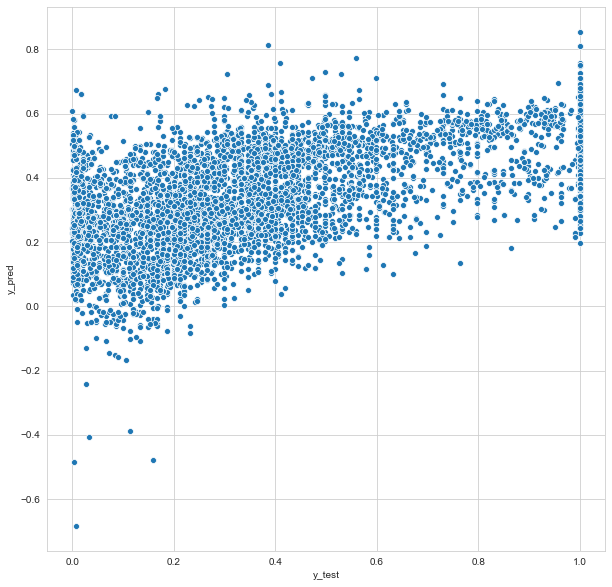

In [122]:
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('y_test', fontsize=10)                        
plt.ylabel('y_pred', fontsize=10)  

In [123]:
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

K Nearest Neighbours : 54 %
Decision Tree : 47 %
Random Forest : 74 %
AdaBoost : 37 %
Gradient Boosting Regressor : 73 %
XGBRegressor : 73 %
CatBoostRegressor : 72 %


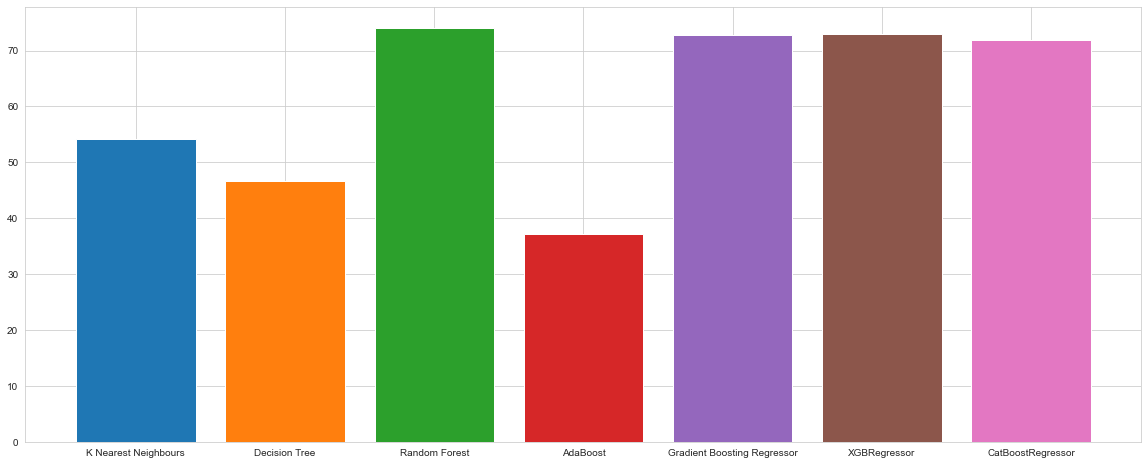

In [124]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [63]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.fit_transform(X_test)

K Nearest Neighbours : 54 %
Decision Tree : 50 %
Random Forest : 72 %
AdaBoost : 41 %
Gradient Boosting Regressor : 73 %
XGBRegressor : 73 %
CatBoostRegressor : 73 %


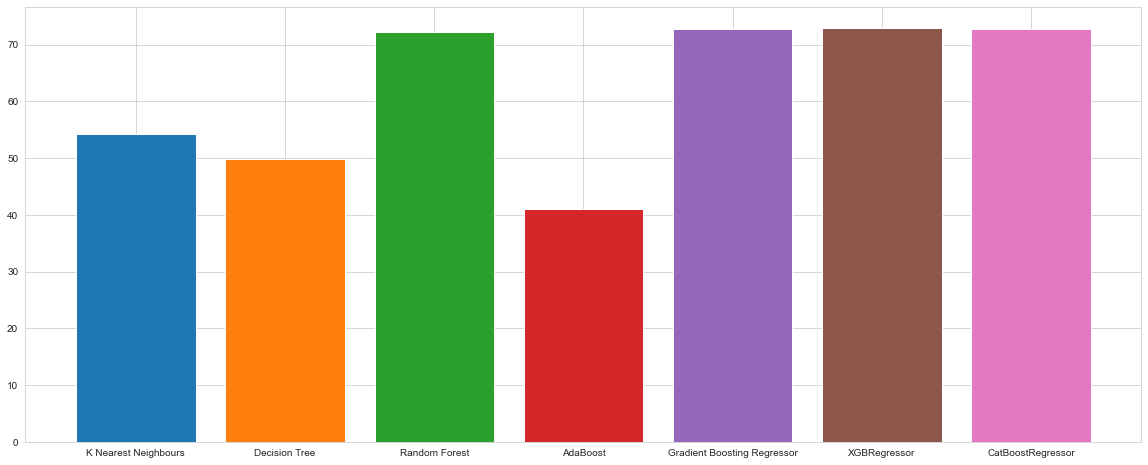

In [64]:
for regressor_name, regressor in regressors:

    regressor.fit(x_train_trans, y_train)    
  
    y_pred = regressor.predict(x_test_trans)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)